# 30-3. 클러스터링(1) K-means

### 1. 데이터 생성

In [1]:
%matplotlib inline
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random


points,labels = make_blobs(n_samples=100,centers=5,n_features=2,random_state=135)
print(points.shape,points[:10])
print(labels.shape,labels[:10])


(100, 2) [[ 4.63411914 -6.52590383]
 [-6.52008604  7.16624288]
 [ 2.14142339 -5.21092623]
 [ 1.70054231  8.54077897]
 [-0.33809159  8.76509668]
 [-7.69329744  7.94546313]
 [ 3.89090121 -3.06531839]
 [ 3.22338498 -2.93209009]
 [-6.63962964  5.34777334]
 [ 6.37904965 -6.46617328]]
(100,) [2 1 0 3 3 1 0 0 1 2]


### 1-2). 생성한 데이터를 좌표에 그려보기

,X,Y
0,4.634119,-6.525904
1,-6.520086,7.166243
2,2.141423,-5.210926
3,1.700542,8.540779
4,-0.338092,8.765097


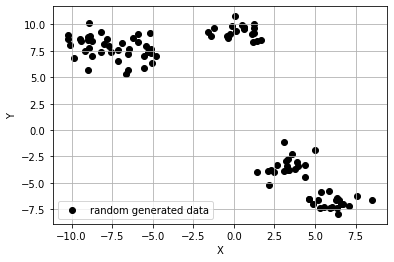

In [3]:
#축 그리기
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

#위에서 생성한 점 데이터들을 pandas dataframe 형태로 변환하기
points_df = pd.DataFrame(points,columns=['X','Y'])
display(points_df.head())

ax.scatter(points[:,0],points[:,1],c='black',label='random generated data')

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.legend()
ax.grid()

### 2. 생성한 데이터에 K-means 알고리즘 적용

In [4]:
from sklearn.cluster import KMeans

#원하는 클러스터의 수(K)를 결정합니다.
#무작위로 클러스터의 수와 같은 K개의 중심점(centroid)을 선정합니다. 이들은 각각의 클러스터를 대표합니다.
kmeans_cluster = KMeans(n_clusters=5)
#나머지 점들과 모든 중심점 간의 유클리드 거리를 계산한 후, 가장 가까운 거리를 가지는 중심점의 클러스터에 속하도록 합니다.
#각 K개의 클러스터의 중심점을 재조정합니다. 특정 클러스터에 속하는 모든 점들의 평균값이 해당 클러스터 다음 iteration의 중심점이 됩니다.(이 중심점은 실제로 존재하는 데이터가 아니어도 상관없습니다.)
#재조정된 중심점을 바탕으로 모든 점들과 새로 조정된 중심점 간의 유클리드 거리를 다시 계산한 후, 가장 가까운 거리를 가지는 클러스터에 해당 점을 재배정합니다.
#4.번과 5.번을 반복 수행합니다. 반복의 횟수는 사용자가 적절히 조절하면 되고, 특정 iteration 이상이 되면 수렴(중심점이 더 이상 바뀌지 않음)하게 됩니다.
kmeans_cluster.fit(points)

print(type(kmeans_cluster.labels_))
print(np.shape(kmeans_cluster.labels_))
print(np.unique(kmeans_cluster.labels_))

<class 'numpy.ndarray'>
(100,)
[0 1 2 3 4]


### 2-2) 클러스터링 결과를 시각화해서 보기

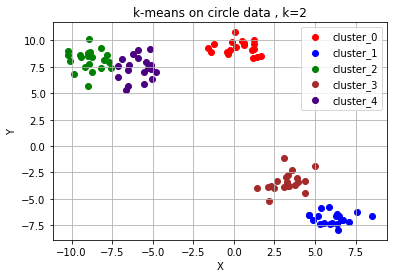

# 3. K-means 알고리즘이 잘 동작하지 않는 예시들

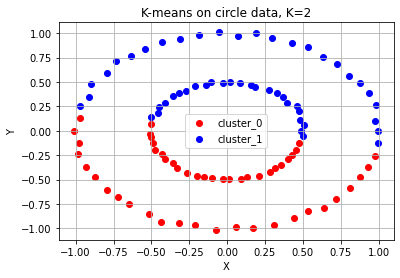

In [6]:
# K-means algorithm이 잘 동작하지 않는 예시 (1) 원형 분포
from sklearn.datasets import make_circles

# 원형 분포 데이터 생성
circle_points, circle_labels = make_circles(n_samples=100, factor=0.5, noise=0.01) # 원형 분포를 가지는 점 데이터 100개를 생성합니다.

# 캔버스 생성
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 원형 분포에 대해 K-means 수행
circle_kmeans = KMeans(n_clusters=2)
circle_kmeans.fit(circle_points)
color_dict = {0: 'red', 1: 'blue'}
for cluster in range(2):
    cluster_sub_points = circle_points[circle_kmeans.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('K-means on circle data, K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend() 
ax.grid()

### 3-2) 잘 작동하지 않는 예시2

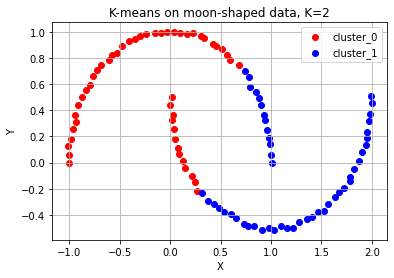

In [7]:
from sklearn.datasets import make_moons

moon_points, moon_labels = make_moons(n_samples=100,noise=0.01)

# 캔버스 생성
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

moon_kmeans = KMeans(n_clusters=2)
moon_kmeans.fit(moon_points)
color_dict = {0:'red',1:'blue'}

for cluster in range(2):
    cluster_sub_points = moon_points[moon_kmeans.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('K-means on moon-shaped data, K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend() 
ax.grid()

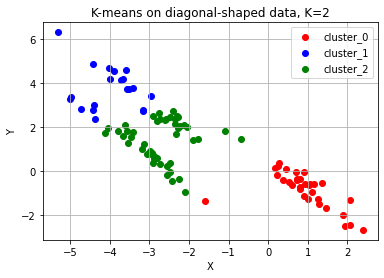

In [8]:
# K-means algorithm이 잘 동작하지 않는 예시 (3) 대각선 모양 분포
from sklearn.datasets import make_circles, make_moons, make_blobs

# 대각선 모양 분포의 데이터 생성
diag_points, _ = make_blobs(n_samples=100, random_state=170) #대각선 분포를 가지는 점 데이터 100개를 생성합니다.(현재는 무작위 분포)
transformation = [[0.6, -0.6], [-0.4, 0.8]] #대각선 변환을 위한 대각 행렬
diag_points = np.dot(diag_points, transformation) #본 과정을 통해 무작위 분포의 점 데이터를 대각선 분포로 변환합니다.

# 캔버스 생성
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 대각선 모양 분포 데이터 plot
diag_kmeans = KMeans(n_clusters=3)
diag_kmeans.fit(diag_points)
color_dict = {0: 'red', 1: 'blue', 2: 'green'}
for cluster in range(3):
    cluster_sub_points = diag_points[diag_kmeans.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('K-means on diagonal-shaped data, K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend() 
ax.grid()

# 30-4. 클러스터링(2) DBSCAN

### 2. DBSCAN 알고리즘을 적용해보기

# of cluster: 2
DBSCAN Y-hat: [0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0
 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1
 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0]


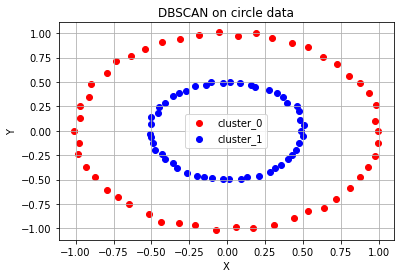

In [9]:
from sklearn.cluster import DBSCAN

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
color_dict = {0:'red',1:'blue',2:'green',3:'brown',4:'purple'}

epsilon,minPts = 0.2,3
circle_dbscan = DBSCAN(eps=epsilon,min_samples=minPts)
circle_dbscan.fit(circle_points)
n_cluster = max(circle_dbscan.labels_)+1

print(f'# of cluster: {n_cluster}')
print(f'DBSCAN Y-hat: {circle_dbscan.labels_}')

# DBSCAN 알고리즘의 수행결과로 도출된 클러스터의 수를 기반으로 색깔별로 구분하여 점에 색칠한 후 도식
for cluster in range(n_cluster):
    cluster_sub_points = circle_points[circle_dbscan.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('DBSCAN on circle data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

# of cluster: 2
DBSCAN Y-hat: [0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1
 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1
 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0]


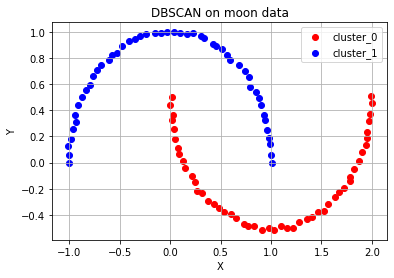

In [13]:
# 달 모양 분포 데이터 plot - 위와 같은 과정 반복
fig = plt.figure()
ax= fig.add_subplot(1, 1, 1)
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3:'brown',4:'purple'} # n 번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary

epsilon, minPts = 0.4, 3
moon_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
moon_dbscan.fit(moon_points)
n_cluster = max(moon_dbscan.labels_)+1

print(f'# of cluster: {n_cluster}')
print(f'DBSCAN Y-hat: {moon_dbscan.labels_}')

for cluster in range(n_cluster):
    cluster_sub_points = moon_points[moon_dbscan.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('DBSCAN on moon data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

# of cluster: 3
DBSCAN Y-hat: [ 0  1  1  0  0  2  2  0  1  2  2  2  0  2  0  1  2  2  2  1  1  1  1  1
  2  2  0  1  0  2  1  0  2  1  2  0  0  0  0  0  1  0  1  0  0  2  1  1
  0  2  1  1  2  1  0  2 -1  2  0  0  2  0  0  1  0  1  1  2  2  2 -1  0
  2  0  0  0  1  2  2 -1  2  2  1  2  0  0  2  1  1  2  1  1  2  0 -1  1
  0  0  0  1]


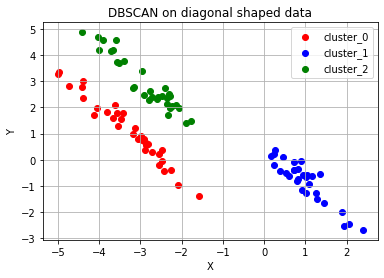

In [14]:
# 대각선 모양 분포 데이터 plot - 위와 같은 과정 반복
fig = plt.figure()
ax= fig.add_subplot(1, 1, 1)
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3:'brown',4:'purple'} # n 번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary

epsilon, minPts = 0.7, 3
diag_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
diag_dbscan.fit(diag_points)
n_cluster = max(diag_dbscan.labels_)+1

print(f'# of cluster: {n_cluster}')
print(f'DBSCAN Y-hat: {diag_dbscan.labels_}')

for cluster in range(n_cluster):
    cluster_sub_points = diag_points[diag_dbscan.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('DBSCAN on diagonal shaped data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

### 3. DBSCAN 알고리즘과 K-means 알고리즘의 소요 시간 비교

# of samples: 100 / Elapsed time of K-means: 0.04852s / DBSCAN: 0.00187s
# of samples: 500 / Elapsed time of K-means: 0.04065s / DBSCAN: 0.00533s
# of samples: 1000 / Elapsed time of K-means: 0.09261s / DBSCAN: 0.01149s
# of samples: 2000 / Elapsed time of K-means: 0.09570s / DBSCAN: 0.02573s
# of samples: 5000 / Elapsed time of K-means: 0.10520s / DBSCAN: 0.15272s
# of samples: 7500 / Elapsed time of K-means: 0.10206s / DBSCAN: 0.19983s
# of samples: 10000 / Elapsed time of K-means: 0.11234s / DBSCAN: 0.28361s
# of samples: 20000 / Elapsed time of K-means: 0.09722s / DBSCAN: 0.82594s
# of samples: 30000 / Elapsed time of K-means: 0.12797s / DBSCAN: 1.36774s
# of samples: 40000 / Elapsed time of K-means: 0.15022s / DBSCAN: 2.86008s
# of samples: 50000 / Elapsed time of K-means: 0.17962s / DBSCAN: 4.14082s


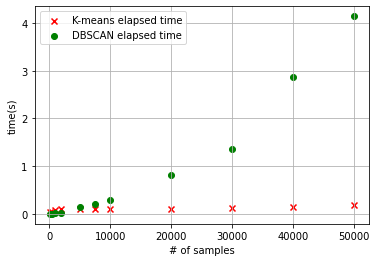

In [15]:
# DBSCAN 알고리즘과 K-means 알고리즘의 시간을 비교하는 코드 
import time

n_samples= [100, 500, 1000, 2000, 5000, 7500, 10000, 20000, 30000, 40000, 50000]

kmeans_time = []
dbscan_time = []
x = []
for n_sample in n_samples:
    dummy_circle, dummy_labels = make_circles(n_samples=n_sample, factor=0.5, noise=0.01) # 원형의 분포를 가지는 데이터 생성

    # K-means 시간을 측정
    kmeans_start = time.time()
    circle_kmeans = KMeans(n_clusters=2)
    circle_kmeans.fit(dummy_circle)
    kmeans_end = time.time()

    # DBSCAN 시간을 측정
    dbscan_start = time.time()
    epsilon, minPts = 0.2, 3
    circle_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
    circle_dbscan.fit(dummy_circle)
    dbscan_end = time.time()

    x.append(n_sample)
    kmeans_time.append(kmeans_end-kmeans_start)
    dbscan_time.append(dbscan_end-dbscan_start)
    print("# of samples: {} / Elapsed time of K-means: {:.5f}s / DBSCAN: {:.5f}s".format(n_sample, kmeans_end-kmeans_start, dbscan_end-dbscan_start))

# K-means와 DBSCAN의 소요 시간 그래프화
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, kmeans_time, c='red', marker='x', label='K-means elapsed time')
ax.scatter(x, dbscan_time, c='green', label='DBSCAN elapsed time')
ax.set_xlabel('# of samples')
ax.set_ylabel('time(s)')
ax.legend()
ax.grid()

# 30-5. 차원 축소(1) PCA

In [17]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

cancer_X,cancer_y = cancer.data,cancer['target']
train_X,test_X,train_y,test_y = train_test_split(cancer_X,cancer_y,test_size=0.1,random_state=10)
print("전체 검사자 수: {}".format(len(cancer_X)))
print("Train dataset에 사용되는 검사자 수: {}".format(len(train_X)))
print("Test dataset에 사용되는 검사자 수: {}".format(len(test_X)))
cancer_df = pd.DataFrame(cancer_X, columns=cancer['feature_names'])
cancer_df.head()

전체 검사자 수: 569
Train dataset에 사용되는 검사자 수: 512
Test dataset에 사용되는 검사자 수: 57


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
cancer_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

### 2. 유방암 데이터셋에 PCA 알고리즘 적용 예제

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.metrics import accuracy_score
from collections import Counter

#그래프 그려줄 때 색상 정보 정리
color_dict = {0:'red',1:'blue',2:'red',3:'blue'}
target_dict = {0:'marlignant_train',1:'benign_train',2:'malignant_test',3:'benign_test'}

train_X = StandardScaler().fit_transform(train_X)
train_df = pd.DataFrame(train_X,columns=cancer['feature_names'])
pca = PCA(n_components=2)
pc = pca.fit_transform(train_df)

In [21]:
test_X_ = StandardScaler().fit_transform(test_X)
test_df = pd.DataFrame(test_X_,columns=cancer['feature_names'])
pca_test = PCA(n_components=2)
pc_test = pca_test.fit_transform(test_df)

In [22]:
def plot_decision_boundary(X,clf,ax):
    h = .02
    x_min,x_max = X[:,0].min() -1, X[:,0].max() + 1
    y_min,y_max = X[:,0].min() -1, X[:,0].max() + 1
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contour(xx,yy,Z,cmap='Blues')
    
#PCA를 적용한 데이터
clf = svm.SVC(kernel='rbf',gamma=0.5,C=0.8)
clf.fit(pc,train_y)

#PCA를 적용하지 않은 데이터
clf_orig = svm.SVC(kernel='rbf',gamma=0.5,C=0.8)
clf_orig.fit(train_df,train_y)

SVC(C=0.8, gamma=0.5)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


PCA 분석을 사용한 Test dataset accuracy: 54명/57명 => 0.947
PCA를 적용하지 않은 Test dataset accuracy: 43명/57명 => 0.754


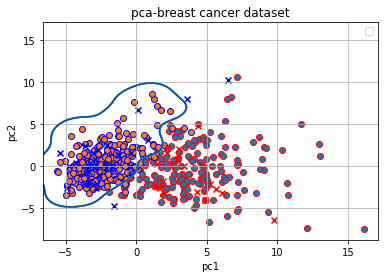

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plot_decision_boundary(pc,clf,ax)

for cluster in range(2):
    #train data 그리기
    sub_cancer_points = pc[train_y==cluster]
    ax.scatter(sub_cancer_points[:,0],sub_cancer_points[:,1],edgecolor=color_dict[cluster])
  
#test data 그리기
for cluster in range(2):
    sub_cancer_points = pc_test[test_y==cluster]
    ax.scatter(sub_cancer_points[:,0],sub_cancer_points[:,1],marker='x',c=color_dict[cluster])

ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_title('pca-breast cancer dataset')
ax.legend()
ax.grid()

pca_test_accuracy_dict = Counter(clf.predict(pc_test)==test_y)
orig_test_accuracy_dict = Counter(clf_orig.predict(test_df)==test_y)

print("PCA 분석을 사용한 Test dataset accuracy: {}명/{}명 => {:.3f}".format(pca_test_accuracy_dict[True], sum(pca_test_accuracy_dict.values()), clf.score(pc_test, test_y)))
print("PCA를 적용하지 않은 Test dataset accuracy: {}명/{}명 => {:.3f}".format(orig_test_accuracy_dict[True], sum(orig_test_accuracy_dict.values()), clf_orig.score(test_df, test_y)))

# 30-6. 차원 축소(2) T-SNE

In [26]:
from scipy.io import arff
import pandas as pd
import os

path = './data/mnist_784.arff'
mnist = arff.loadarff(path)

In [35]:
df = pd.DataFrame(mnist[0])
df['label'] = df['class'].apply(lambda i : str(i)[2])
n_image = mnist[0].shape[0]
pixel_columns = list(df.columns[:-2])
df.head()

(70000,)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'5',5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0',0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'4',4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1',1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'9',9


In [38]:
import numpy as np

np.random.seed(30)
rndperm = np.random.permutation(n_image)
print(rndperm)

n_image_sample = 10000
random_idx = rndperm[:n_image_sample]
df_subset = df.loc[random_idx,:].copy()
df_subset.shape

[44332  3703 68011 ... 46220 48045 38693]


(10000, 786)

<Figure size 432x288 with 0 Axes>

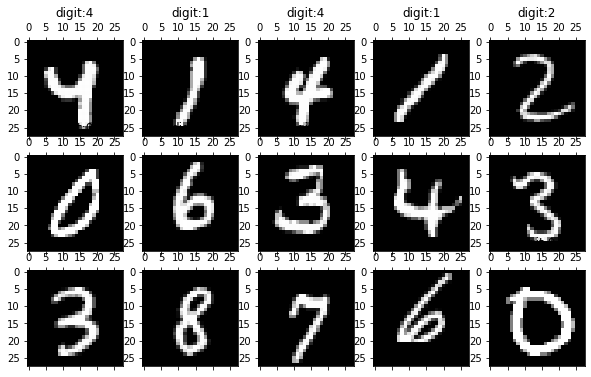

In [40]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

plt.gray()
fig = plt.figure(figsize=(10,6))
n_img_sample = 15
width,height = 28,28

for i in range(0,n_img_sample):
    row = df_subset.iloc[i]
    ax = fig.add_subplot(3,5,i+1,title=f"digit:{row['label']}")
    ax.matshow(row[pixel_columns]
              .values.reshape((width,height))
              .astype(float))    
                         
plt.show()

### 2. PCA 를 이용한 MNIST 차원축소

In [41]:
df.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [48]:
n_test = 10000
test_X =df.iloc[:n_test,:-2]
train_X = df.iloc[n_test:,:-2]

In [53]:
print(train_X.columns)

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=784)


In [51]:
test_y = df.iloc[:n_test,785:]
train_y = df.iloc[n_test:,785:]

In [63]:
#내가 쓴 코드
train_X = StandardScaler().fit_transform(train_X)
train_df = pd.DataFrame(train_X)
pca = PCA(n_components=2)
pc = pca.fit_transform(train_df)
#print(pc)

test_X_ = StandardScaler().fit_transform(test_X)
test_df = pd.DataFrame(test_X_)
pca_test = PCA(n_components=2)
pc_test = pca_test.fit_transform(test_df)
print(pc_test.shape)

(10000, 2)


In [58]:
from sklearn.decomposition import PCA

print(df_subset.shape)
n_dimension = 2
pca = PCA(n_components=n_dimension)

pca_result = pca.fit_transform(df_subset[pixel_columns].values)
print(pca_result)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1]

print(pca_result.shape)

(10000, 788)
[[-137.78630344 -717.5535339 ]
 [-951.0618742   439.73273365]
 [-266.73669576 -181.61649658]
 ...
 [ 464.97221948   82.31984601]
 [ 312.58326864  452.89736628]
 [ 461.12043301  170.30493001]]
(10000, 2)


In [64]:
print(f"pca-1: {round(pca.explained_variance_ratio_[0],3)*100}%")
print(f"pca-2: {round(pca.explained_variance_ratio_[1],3)*100}%")

pca-1: 5.6000000000000005%
pca-2: 4.0%


<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

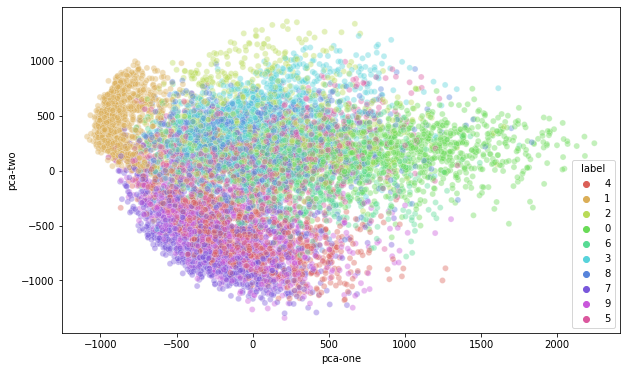

In [65]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='pca-one',y='pca-two',
    hue='label',
    palette=sns.color_palette("hls",10),
    data=df_subset,
    legend='full',
    alpha=0.4)

In [66]:
from sklearn.manifold import TSNE

print(df_subset.shape)
n_dimension = 2
tsne = TSNE(n_components=n_dimension,learning_rate='auto',init='random', perplexity=3)

tsne_result = tsne.fit_transform(df_subset[pixel_columns].values)
print(tsne_result)
df_subset['tsne-one'] = tsne_result[:,0]
df_subset['tsne-two'] = tsne_result[:,1]

print(tsne_result.shape)

(10000, 788)
[[-87.97603    28.603367 ]
 [  6.455858   33.329086 ]
 [-58.426163    2.9468114]
 ...
 [ 66.236145   44.101337 ]
 [  8.391117  -66.793594 ]
 [-48.657295  -72.164406 ]]
(10000, 2)


<AxesSubplot:xlabel='tsne-one', ylabel='tsne-two'>

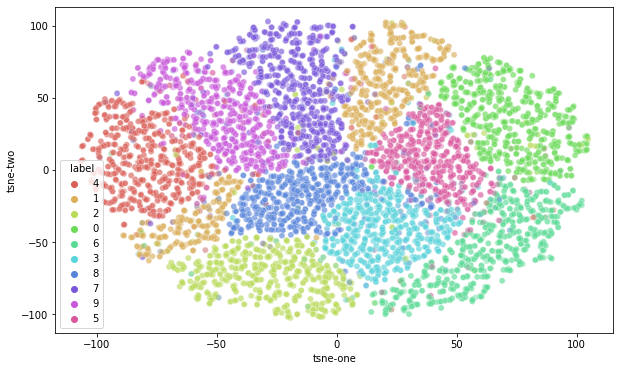

In [67]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='tsne-one',y='tsne-two',
    hue='label',
    palette=sns.color_palette("hls",10),
    data=df_subset,
    legend='full',
    alpha=0.4)